####  Read the data

In [2]:
import pandas as pd
import os

**Merge dataset together**

In [12]:
df1 = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

file_list = os.listdir("./Sales_Data")

all_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv("./Sales_Data/" + file)
    
    all_data = pd.concat([df,all_data],ignore_index=True)
    
all_data.to_csv("all_data.csv",index=False)

#### Clean the data

In [24]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [29]:
#find the NA
na_df = all_data[all_data.isna().any(axis=1)]
na_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#drop na
all_data = all_data.dropna(how="all")

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [68]:
#find the index with "or" in month column
or_index = all_data[all_data.Month == "Or"].index

all_data = all_data.drop(or_index,axis=0)

#### Q1 Find the best sales of month

In [76]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int")

#### Add a sales column

In [73]:
all_data["Sales"] = all_data["Quantity Ordered"].astype("int") * all_data["Price Each"].astype("double")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

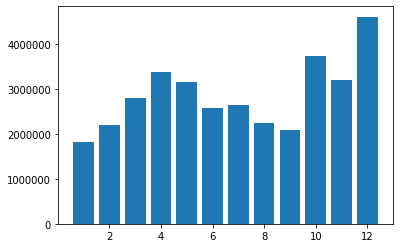

In [178]:
results = all_data.groupby("Month").sum()
Months = range(1,13)
plt.bar(Months,results["Sales"])

#### Q2 Find the best sales across the cities

In [103]:
#Create a city column with city and state name
all_data["City"] = all_data["Purchase Address"].apply(lambda x : x.split(",")[1] + " " + x.split(",")[-1].split(" ")[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland ME
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco CA
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles CA
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco CA


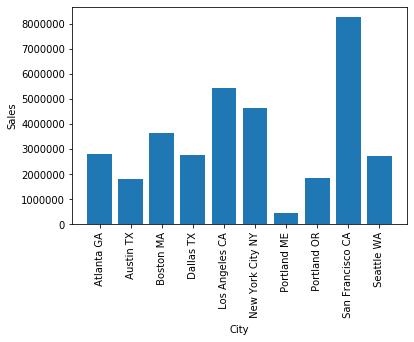

In [179]:
result_city = all_data.groupby("City").sum()
#order the city in terms of sales
city_list = [city for city,df in all_data.groupby("City")]
plt.bar(city_list,result_city["Sales"])
plt.xticks(city_list,rotation="vertical",size=10)
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()

#### Q3 When should we put advertisment

In [171]:
#convert to datetime object
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland ME,19,34
1,209922,Macbook Pro Laptop,1,1700.0,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco CA,10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles CA,20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle WA,10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco CA,18,58


In [141]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

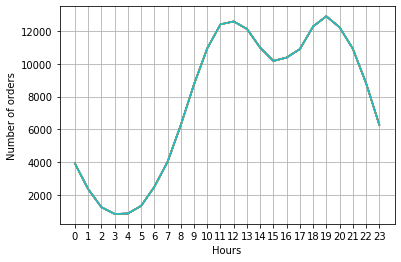

In [180]:
hours = [hour for hour,df in all_data.groupby("Hour")]

plt.plot(hours,all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of orders")
plt.grid()
plt.show()

#Better to plot subplots in terms of different cities

#### Q4 What products are most often sold together

In [206]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [207]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5 What product sold the most

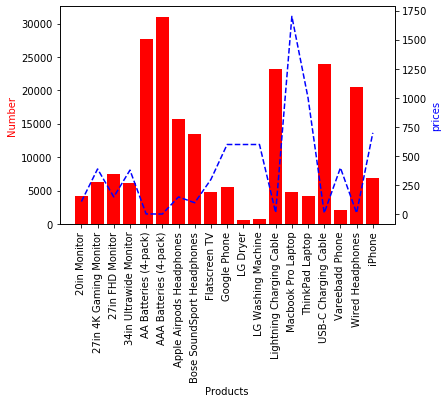

<Figure size 720x360 with 0 Axes>

In [205]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

sold_number = all_data.groupby(["Product"]).sum()
prices = all_data.groupby("Product").mean()["Price Each"]

item_list = [item for item,df in all_data.groupby("Product")]

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(item_list,sold_number["Quantity Ordered"],color="red")
ax2.plot(item_list,prices,"b--")

plt.figure(figsize=(10,5))

ax1.set_xlabel("Products")
ax1.set_ylabel("Number",color="red")
ax2.set_ylabel("prices",color="blue")
ax1.set_xticklabels(item_list,rotation="vertical",size=10)

plt.show()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922,29.655201
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309,29.298990
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402,29.463640
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458,29.747708
